# Compare <$\delta u_L^3$> with and without corrections

In [9]:
# imports
from importlib import reload
import os

import xarray

import numpy as np
# import fsspec
import matplotlib
import matplotlib.pyplot as plt
import gsw_xarray as gsw
from xhistogram.xarray import histogram

from dask.diagnostics import ProgressBar

from strucFunct2_ai import timescale

from profiler import gliderdata
from profiler import profilerpairs
from cugn import io as cugn_io
from cugn import utils as cugn_utils
from cugn import plotting as cugn_plotting

import qg_utils

# Load up

In [2]:
qg, mSF_15 = qg_utils.load_qg()

# Calculate

In [16]:
rr1, du1, du1LL, dull_mn, dull_25, dull_50, du2_mn, du3_mn, du3_corr = \
        qg_utils.calc_dus(qg, mSF_15)

# Plot

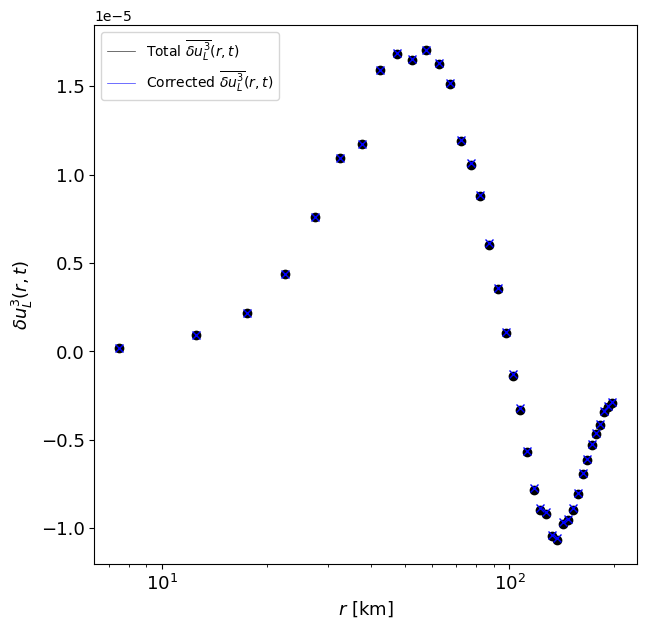

In [25]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()

#
c1 = 'k'
ax.semilogx(rr1*1e-3, du3_mn, 'o', color=c1)
ax.semilogx(0, 0, '-', color=c1, linewidth=0.5, alpha=0.8, 
                label='Total $\\overline{\\delta u^3_{L}}(r, t)$')
# 
c2 = 'b'
ax.semilogx(rr1*1e-3, du3_corr, 'x', color=c2)
ax.semilogx(0, 0, '-', color=c2, linewidth=0.5, alpha=0.8, 
                label='Corrected $\\overline{\\delta u^3_{L}}(r, t)$')
#
ax.legend()
ax.set_xlabel(r'$r$ [km]')
ax.set_ylabel(r'$\delta u^3_{L}(r, t)$')
cugn_plotting.set_fontsize(ax, 13)
plt.show()

# 60 days

In [12]:
ndays = 60

In [40]:
reload(qg_utils)
rr1, du1s, du1LLs, du2s, du3s, du3s_corr = qg_utils.calc_dus_limtime(mSF_15, ndays)

In [36]:
du1LLs

array([ 2.18122981e-06,  5.46208985e-06,  5.58650475e-06,  6.20682856e-06,
        6.89074189e-06,  5.05279160e-06,  1.77504685e-06,  3.95834634e-07,
       -2.09734856e-06, -5.09368738e-06, -9.24099221e-06, -1.35619648e-05,
       -1.85002583e-05, -1.79796817e-05, -1.95689688e-05, -1.97969710e-05,
       -1.34654304e-05, -4.14217287e-06,  8.02685414e-06,  2.05963046e-05,
        3.09381857e-05,  5.21868989e-05,  7.29537187e-05,  9.02205395e-05,
        1.03715983e-04,  1.30477754e-04,  1.54890452e-04,  1.57529063e-04,
        1.77066033e-04,  1.92957628e-04,  1.96587861e-04,  1.90916707e-04,
        1.99173959e-04,  1.96162690e-04,  1.78720475e-04,  1.47355636e-04,
        1.57146417e-04,  1.27371433e-04,  9.24760350e-05])

In [35]:
du1s

array([-2.14515371e-05, -5.27841586e-05, -1.19851330e-04, -1.95208617e-04,
       -2.64029483e-04, -3.56000513e-04, -4.78004005e-04, -5.77213404e-04,
       -6.84510491e-04, -7.97549231e-04, -9.08618542e-04, -1.01686377e-03,
       -1.11842196e-03, -1.21565483e-03, -1.30339530e-03, -1.39309785e-03,
       -1.46704992e-03, -1.52878073e-03, -1.58005093e-03, -1.62015152e-03,
       -1.63526400e-03, -1.63811058e-03, -1.63453258e-03, -1.58854553e-03,
       -1.47087578e-03, -1.41577568e-03, -1.34394628e-03, -1.15648452e-03,
       -1.03459803e-03, -9.16024586e-04, -7.81363842e-04, -6.16833897e-04,
       -5.32508105e-04, -4.49532922e-04, -3.43553767e-04, -2.67415499e-04,
       -3.04208022e-04, -2.82169856e-04, -2.72639679e-04])

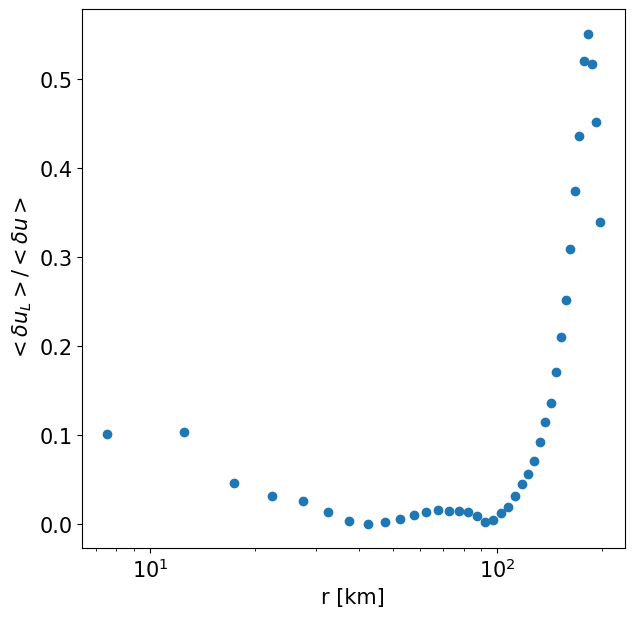

In [42]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()
ax.plot(rr1*1e-3, np.abs(du1LLs)/np.abs(du1s), 'o')
#
ax.set_xscale('log')
ax.set_xlabel('r [km]')
ax.set_ylabel(r'$<\delta u_L> / <\delta u>$')
#
cugn_plotting.set_fontsize(ax, 15)
plt.show()

## Plot

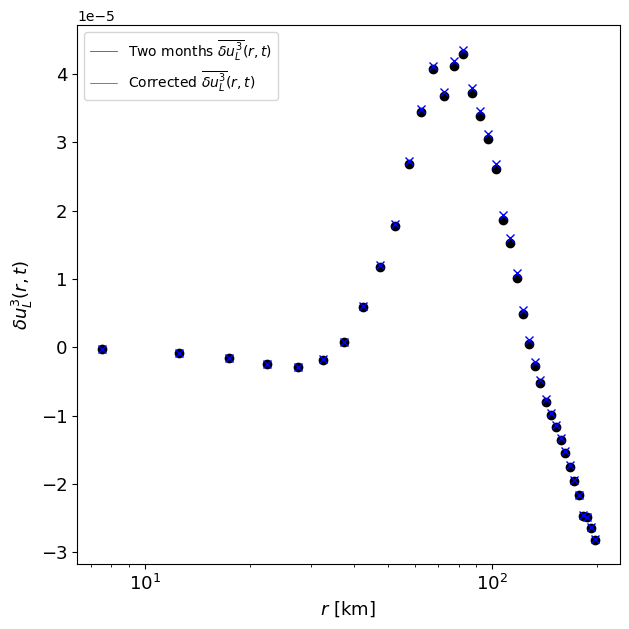

In [41]:
fig = plt.figure(figsize=(7,7))
ax = plt.gca()

#
c1 = 'k'
ax.semilogx(rr1*1e-3, du3s, 'o', color=c1)
ax.semilogx(0, 0, '-', color=c1, linewidth=0.5, alpha=0.8, 
                label='Two months $\\overline{\\delta u^3_{L}}(r, t)$')
# 
c2 = 'b'
ax.semilogx(rr1*1e-3, du3s_corr, 'x', color=c2)
ax.semilogx(0, 0, '-', color=c2, linewidth=0.5, alpha=0.8, 
                label='Corrected $\\overline{\\delta u^3_{L}}(r, t)$')
#
ax.legend()
ax.set_xlabel(r'$r$ [km]')
ax.set_ylabel(r'$\delta u^3_{L}(r, t)$')
cugn_plotting.set_fontsize(ax, 13)
plt.show()

----

In [32]:
mSF_15.dr[0,:].values*1e-3

array([  2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
        47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5,
        92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5, 132.5,
       137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5, 177.5,
       182.5, 187.5, 192.5, 197.5, 202.5, 207.5, 212.5, 217.5, 222.5,
       227.5, 232.5, 237.5, 242.5, 247.5, 252.5, 257.5, 262.5, 267.5,
       272.5, 277.5, 282.5, 287.5, 292.5])